### R调用K-means算法——stat库

参考[doc](https://www.rdocumentation.org/packages/stats/versions/3.5.3/topics/kmeans)

#### Toy dataset

In [27]:
# dataset: a 2-dimensional example
data <- rbind(matrix(rnorm(100, sd = 0.3), ncol = 2),
           matrix(rnorm(100, mean = 1, sd = 0.3), ncol = 2))
colnames(data) <- c("x", "y")

In [28]:
head(data, 3)

x,y
-0.37657799,0.337519859
0.05328298,-0.003145233
0.26441146,0.484388595


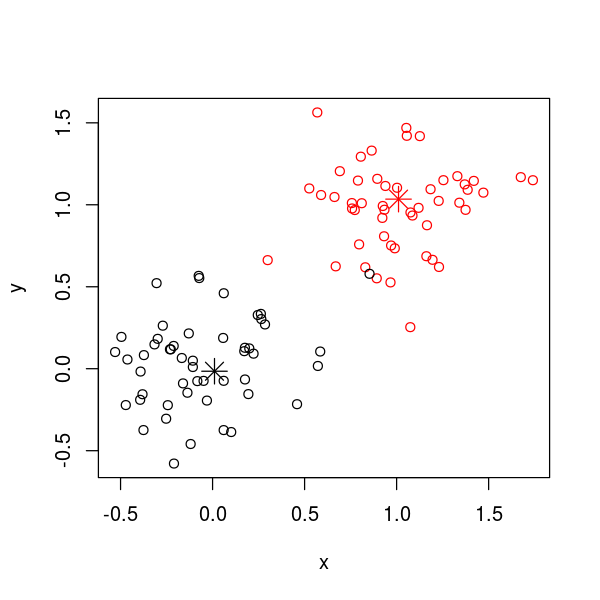

In [46]:
# 调用算法， 随机选取两个类中心
options(repr.plot.width=5, repr.plot.height=5)  # plot size
km.out <- kmeans(data, 2)
plot(x, col = km.out$cluster)
points(km.out$centers, col = 1:2, pch = 8, cex = 2)

In [47]:
km.out

K-means clustering with 2 clusters of sizes 50, 50

Cluster means:
           x          y
1 0.01041918 -0.0153271
2 1.01036696  1.0344472

Clustering vector:
  [1] 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2

Within cluster sum of squares by cluster:
[1]  9.585107 10.970212
 (between_SS / total_SS =  71.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [30]:
# sum of squares
ss <- function(x) sum(scale(x, scale = FALSE)^2)

注意`scale`是用于标准化的函数，默认参数`center=TRUE`，即各值减去所在列的均值（中心化），`scale=TRUE`，即除以所在列的标准差。这里设置`scale=FALSE`，即只进行中心化，等同于`xs-mean(xs)`

In [33]:
## cluster centers "fitted" to each obs.:
fitted.x <- fitted(km.out)
head(fitted.x, 3)
resid.x <- data - fitted(km.out)
head(resid.x, 3)

,x,y
1,0.01041918,-0.0153271
1,0.01041918,-0.0153271
1,0.01041918,-0.0153271


x,y
-0.3869972,0.35284696
0.0428638,0.01218187
0.2539923,0.49971570


In [43]:
## Equalities
cbind(km.out[c("betweenss", "tot.withinss", "totss")], # the same two columns
         c(ss(fitted.x), ss(resid.x), ss(data)))

stopifnot(# these three are the same:
    all.equal(km.out$betweenss, ss(fitted.x)),
    all.equal(km.out$betweenss, km.out$totss - km.out$tot.withinss),
    # sum of square function
    all.equal(km.out$totss, ss(data)),
    all.equal(km.out$tot.withinss, ss(resid.x)),
    ## and hence also
    all.equal(ss(data), ss(fitted.x) + ss(resid.x))
)

betweenss,52.54804,52.54804
tot.withinss,20.55532,20.55532
totss,73.10336,73.10336


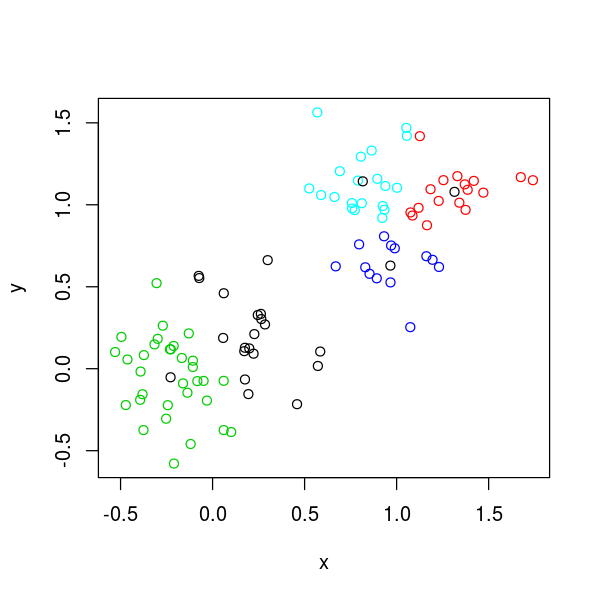

In [44]:
## random starts do help here with too many clusters
## (and are often recommended anyway!):
km.out <- kmeans(x, 5, nstart = 25)
plot(x, col = km.out$cluster)
points(km.out$centers)

这里`nstart`的解释为`how many random sets should be chosen`，即多次选择初始类中心（这里为25次），返回其中最优（`tot.withinss`最小）的结果。（参考， James&Hastie）

#### Full steps

##### Data Preparations

In [1]:
df <- USArrests
df <- na.omit(df)
df <- scale(df)
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


关于数据的标准化：

The data must be standardized (i.e., scaled) to make variables comparable. Recall that, standardization consists of transforming the variables such that they have mean zero and standard deviation one.

Standardization makes the four distance measure methods - Euclidean, Manhattan, Correlation and Eisen - more similar than they would be with non-transformed data

In [2]:
library(factoextra)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


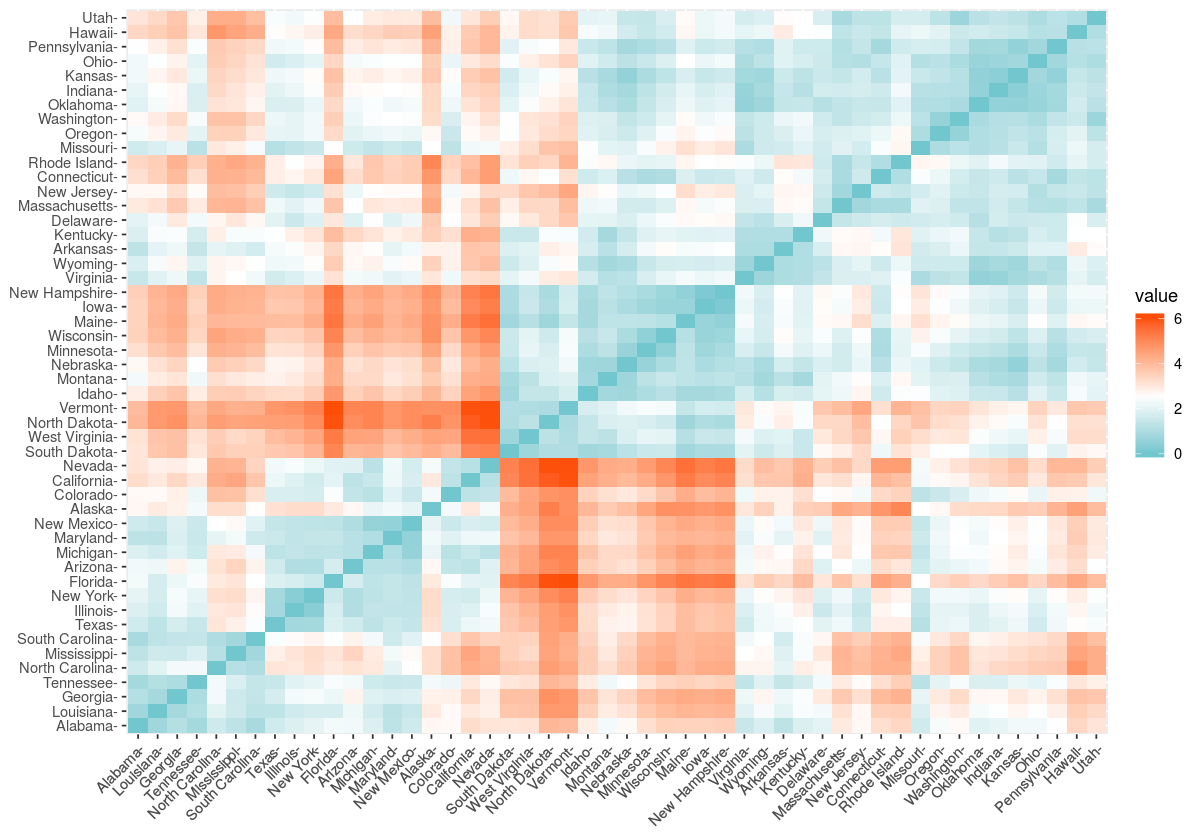

In [5]:
# 距离矩阵可视化
options(repr.plot.hight=7, repr.plot.width=10)
distance <- get_dist(df)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

##### Computing k-means clustering in R|

In [6]:
k2 <- kmeans(df, centers = 2, nstart = 25)
str(k2)

List of 9
 $ cluster     : Named int [1:50] 2 2 2 1 2 2 1 1 2 2 ...
  ..- attr(*, "names")= chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ centers     : num [1:2, 1:4] -0.67 1.005 -0.676 1.014 -0.132 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ totss       : num 196
 $ withinss    : num [1:2] 56.1 46.7
 $ tot.withinss: num 103
 $ betweenss   : num 93.1
 $ size        : int [1:2] 30 20
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [7]:
k2

K-means clustering with 2 clusters of sizes 30, 20

Cluster means:
     Murder    Assault   UrbanPop       Rape
1 -0.669956 -0.6758849 -0.1317235 -0.5646433
2  1.004934  1.0138274  0.1975853  0.8469650

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             2              2              2              1              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              1              1              2              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             1              1              2              1              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              1              2              1              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             1              2              1              2              2 
       Montana    

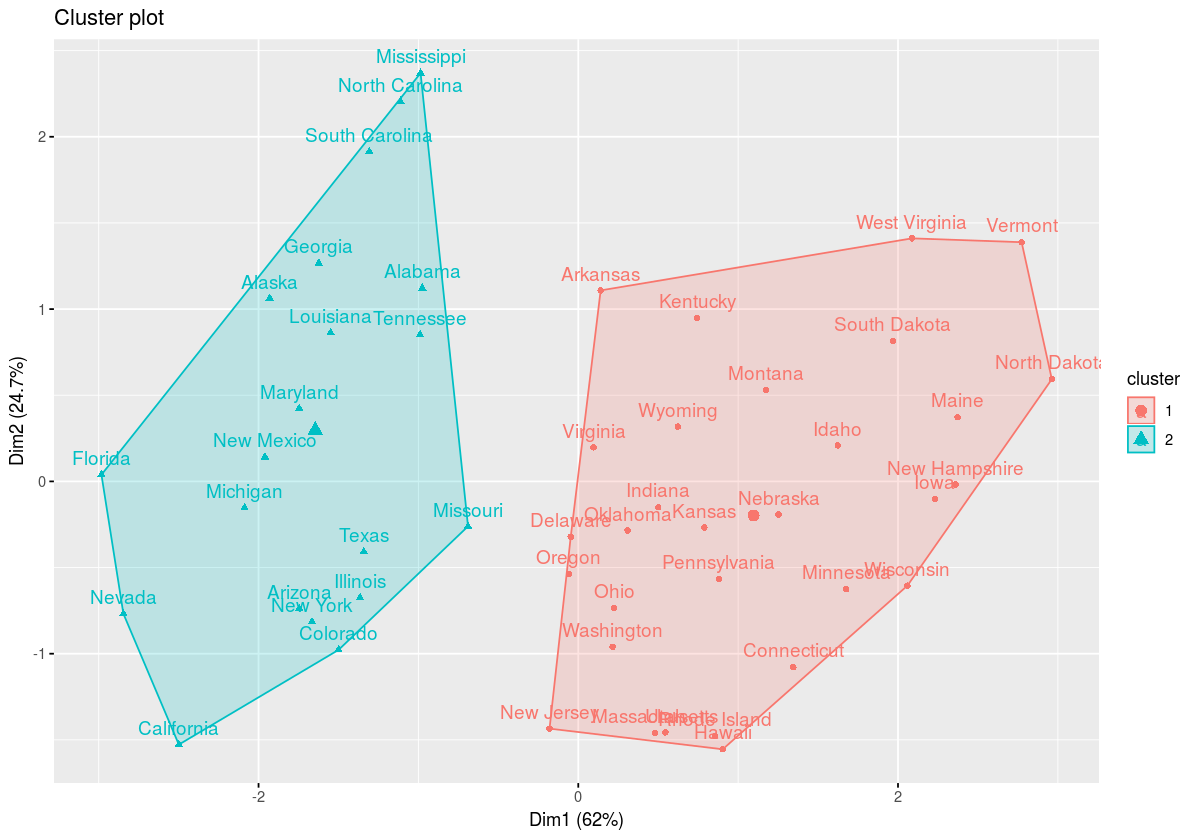

In [8]:
# 维度过高时自动进行PCA，并选取前两个主成分
fviz_cluster(k2, data = df)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


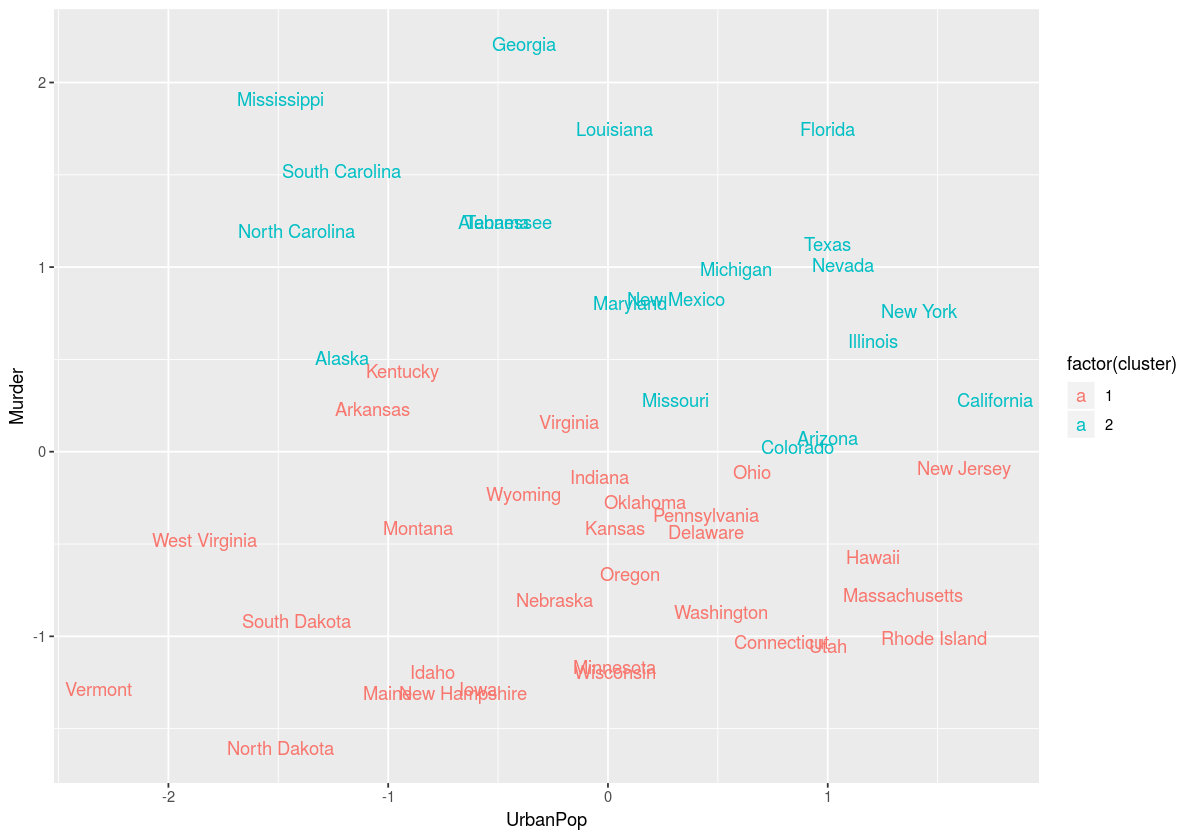

In [10]:
library(tidyverse)
df %>%
  as_tibble() %>%
  mutate(cluster = k2$cluster,
         state = row.names(USArrests)) %>%
  ggplot(aes(UrbanPop, Murder, color = factor(cluster), label = state)) +
  geom_text()


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



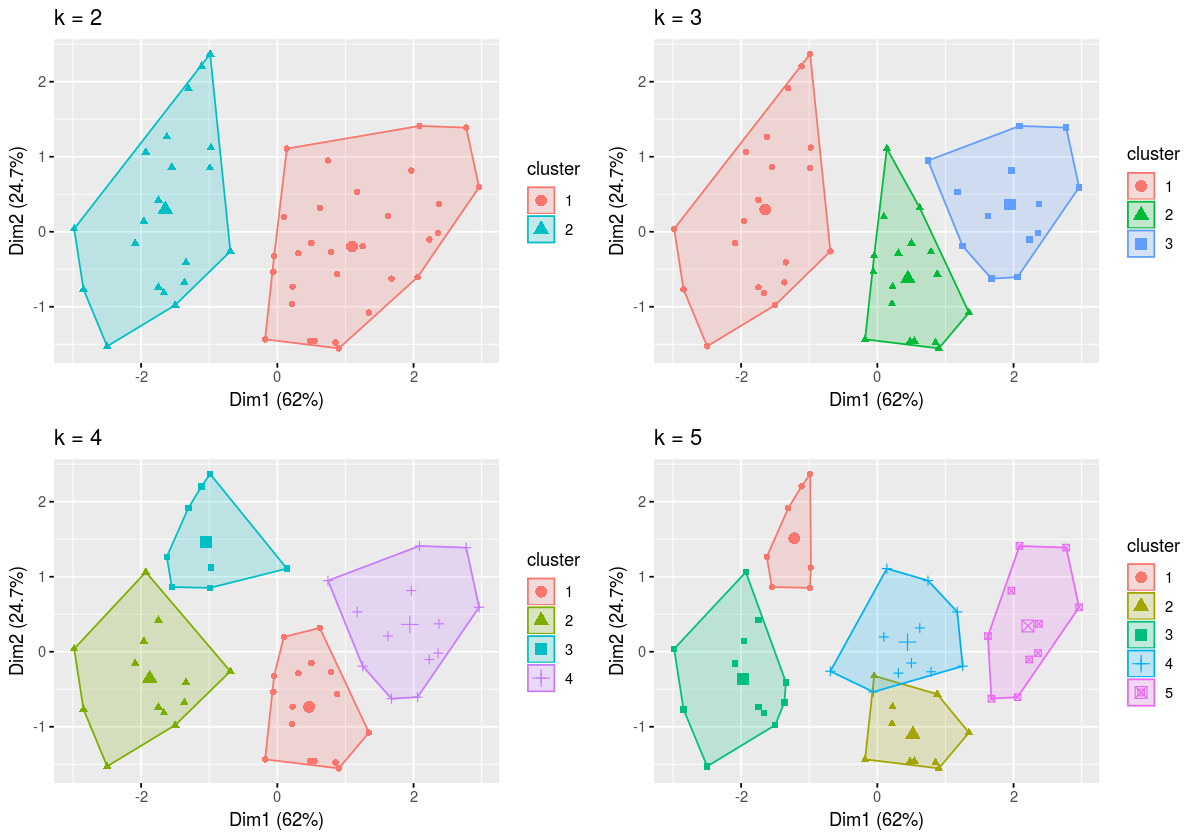

In [11]:
# Multi-k
k3 <- kmeans(df, centers = 3, nstart = 25)
k4 <- kmeans(df, centers = 4, nstart = 25)
k5 <- kmeans(df, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df) + ggtitle("k = 5")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)

##### Determining Optimal Clusters

###### Elbow method

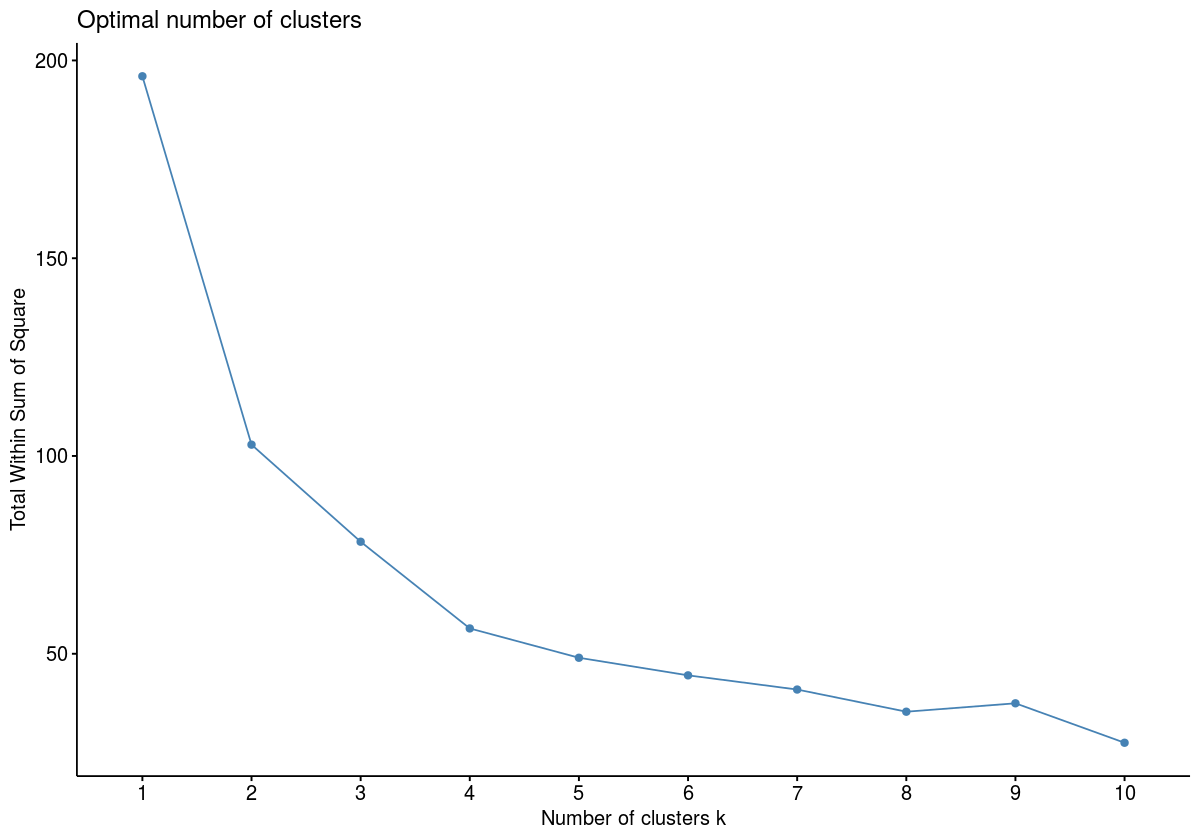

In [12]:
set.seed(123)
fviz_nbclust(df, kmeans, method = "wss")

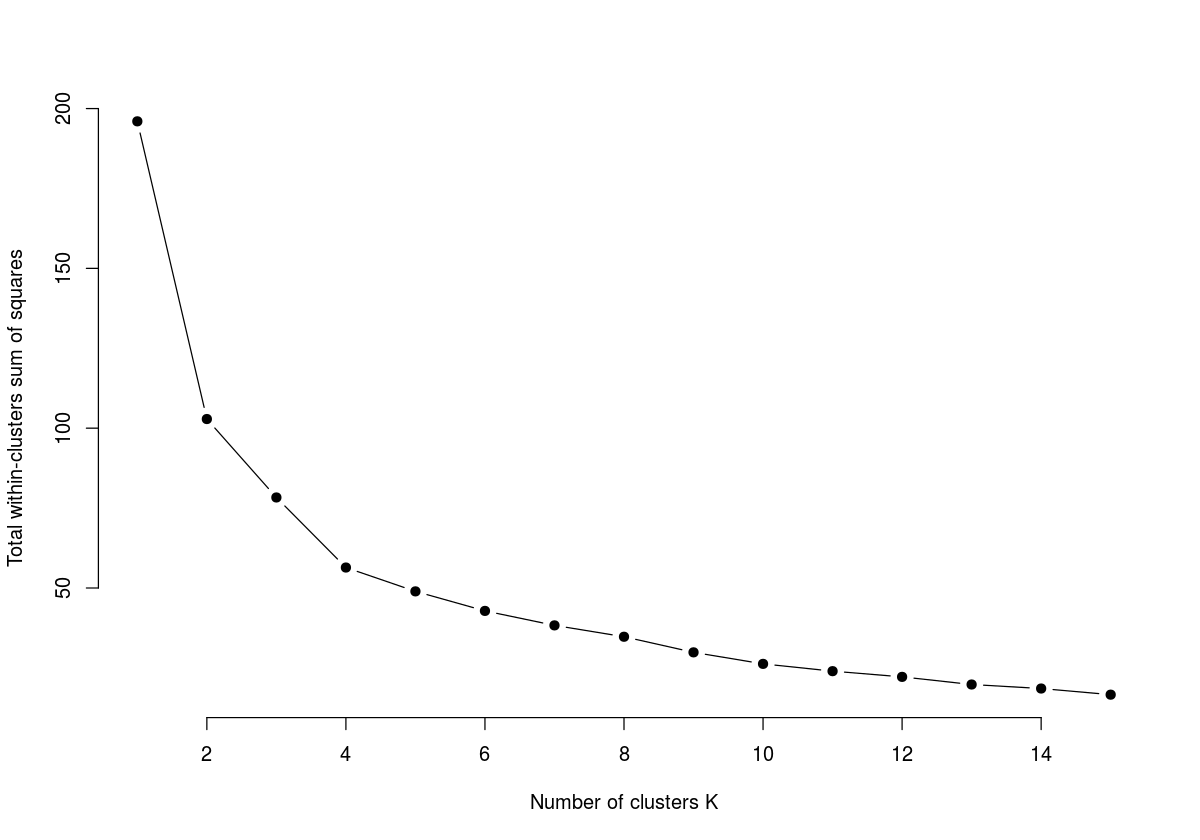

In [13]:
# By hands
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

###### Average Silhouette Method

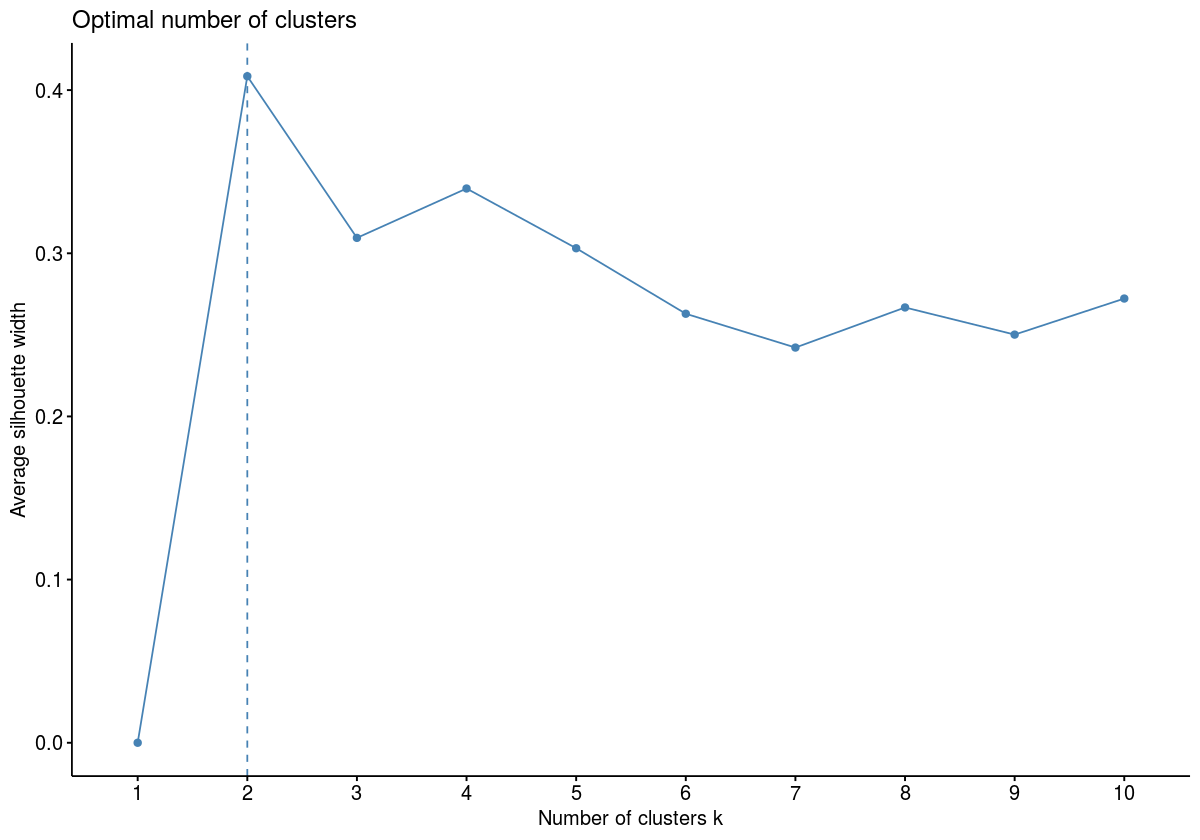

In [14]:
fviz_nbclust(df, kmeans, method = "silhouette")

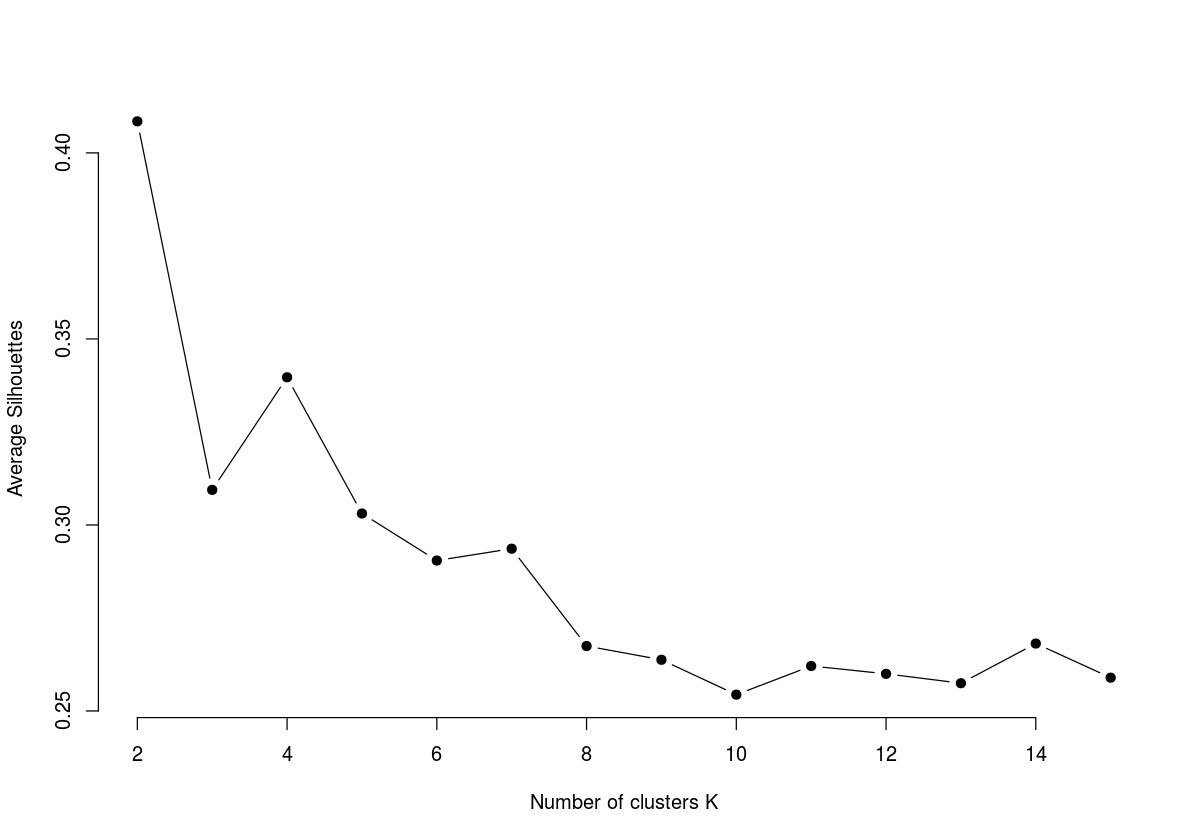

In [16]:
# By hands
# function to compute average silhouette for k clusters
library(cluster)    # clustering algorithms
avg_sil <- function(k) {
  km.res <- kmeans(df, centers = k, nstart = 25)
  ss <- silhouette(km.res$cluster, dist(df))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:15

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

###### Gap Statistic Method

In [18]:
set.seed(123)
gap_stat <- clusGap(df, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
# Print the result
print(gap_stat, method = "firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = df, FUNcluster = kmeans, K.max = 10, B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 4
          logW   E.logW       gap     SE.sim
 [1,] 3.458369 3.638250 0.1798804 0.03653200
 [2,] 3.135112 3.371452 0.2363409 0.03394132
 [3,] 2.977727 3.235385 0.2576588 0.03635372
 [4,] 2.826221 3.120441 0.2942199 0.03615597
 [5,] 2.738868 3.020288 0.2814197 0.03950085
 [6,] 2.669860 2.933533 0.2636730 0.03957994
 [7,] 2.598748 2.855759 0.2570109 0.03809451
 [8,] 2.531626 2.784000 0.2523744 0.03869283
 [9,] 2.468162 2.716498 0.2483355 0.03971815
[10,] 2.394884 2.652241 0.2573567 0.04104674


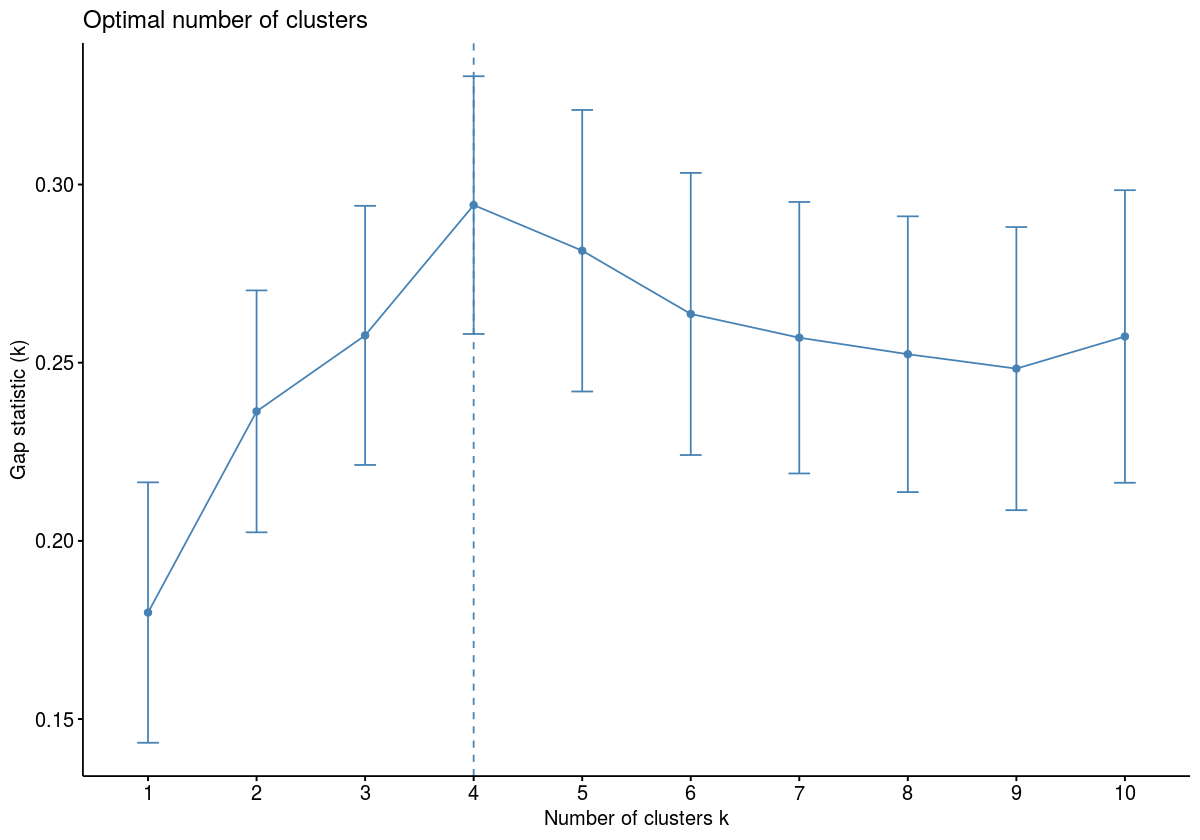

In [19]:
fviz_gap_stat(gap_stat)

##### Extracting Results
由以上，我们发现最佳的聚类数目为4，所以我们进行最终的聚类。

In [20]:
set.seed(123)
final <- kmeans(df, 4, nstart = 25)
final

K-means clustering with 4 clusters of sizes 13, 16, 13, 8

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.9615407 -1.1066010 -0.9301069 -0.96676331
2 -0.4894375 -0.3826001  0.5758298 -0.26165379
3  0.6950701  1.0394414  0.7226370  1.27693964
4  1.4118898  0.8743346 -0.8145211  0.01927104

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             4              3              3              4              3 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             3              2              2              3              4 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              1              3              2              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              1              4              1              3 
 Massachusetts       Michigan      Minnesota    Mississippi    

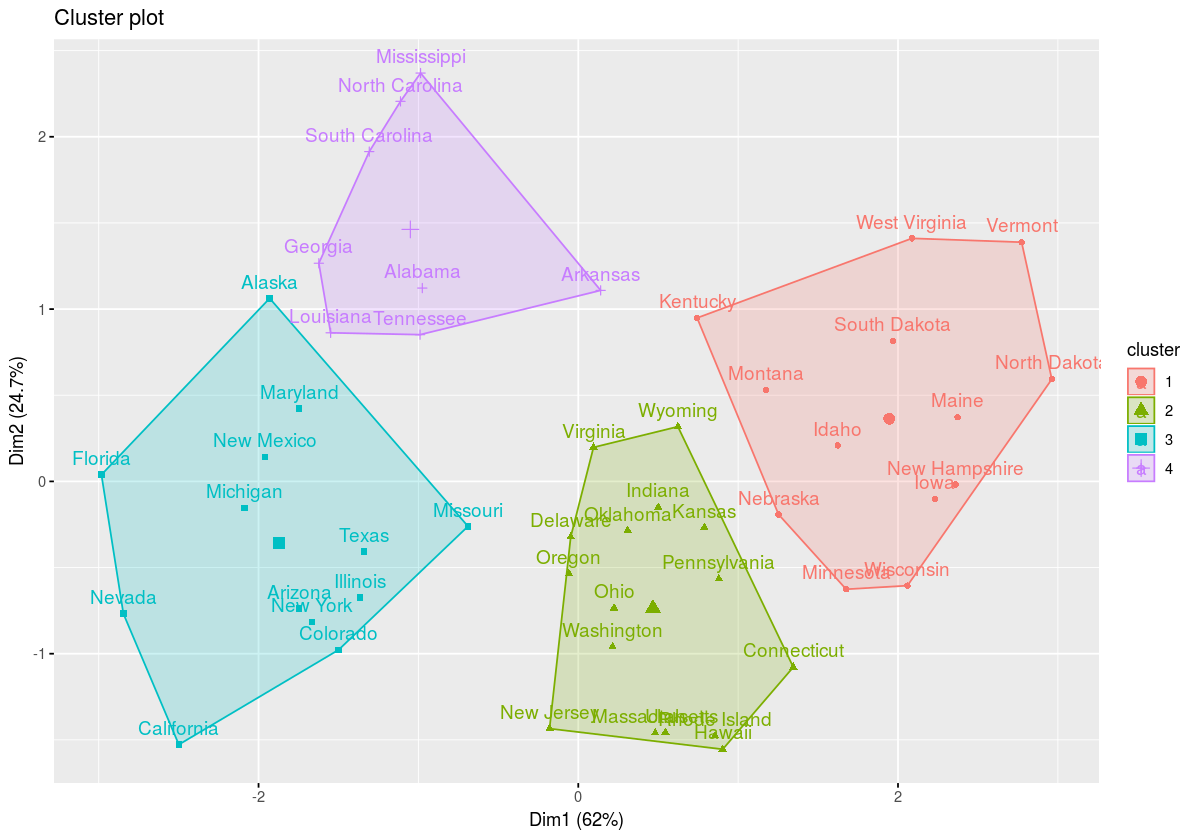

In [21]:
fviz_cluster(final, data = df)

In [22]:
# Do some descriptive statistics at the cluster level
USArrests %>%
  mutate(Cluster = final$cluster) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

Cluster,Murder,Assault,UrbanPop,Rape
1,3.60000,78.53846,52.07692,12.17692
2,5.65625,138.87500,73.87500,18.78125
3,10.81538,257.38462,76.00000,33.19231
4,13.93750,243.62500,53.75000,21.41250


#### Animation!

发现一个有意思的库[`animation`](https://github.com/yihui/animation),可以演示一些统计学中一些方法的过程，下面的演示参考[这里](https://yihui.name/animation/example/kmeans-ani/)

In [48]:
library(animation)

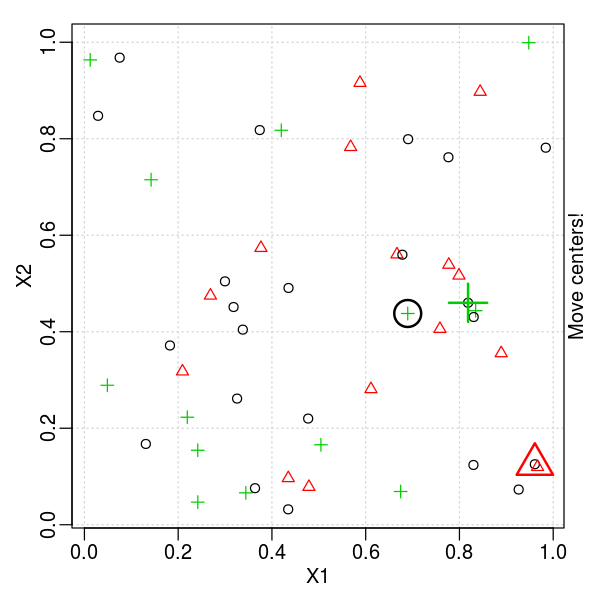

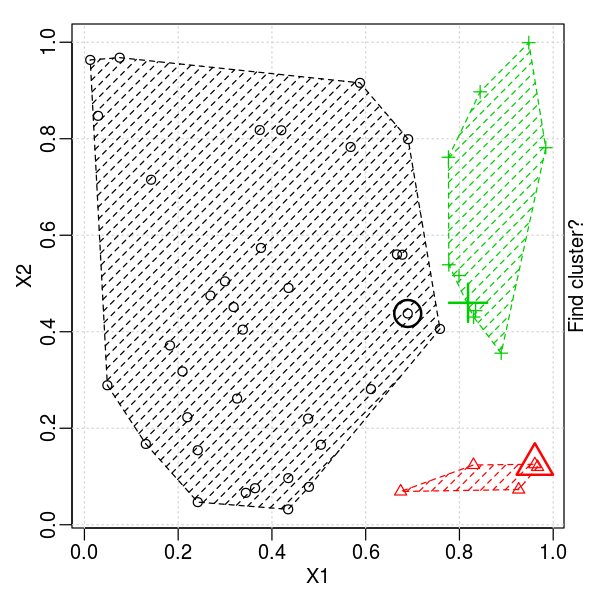

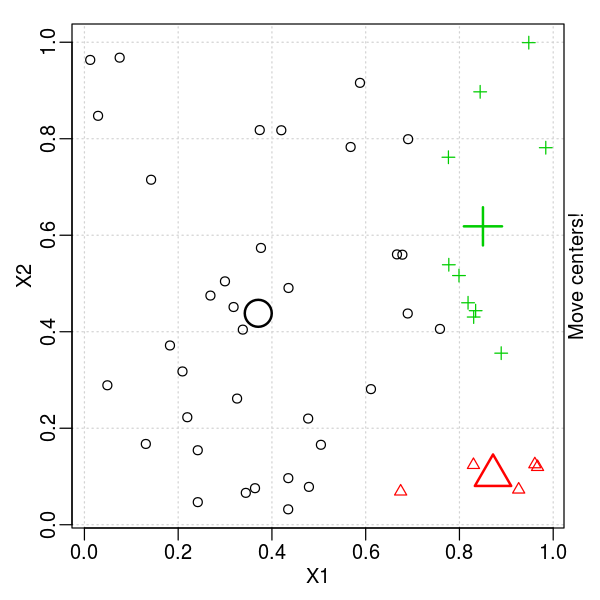

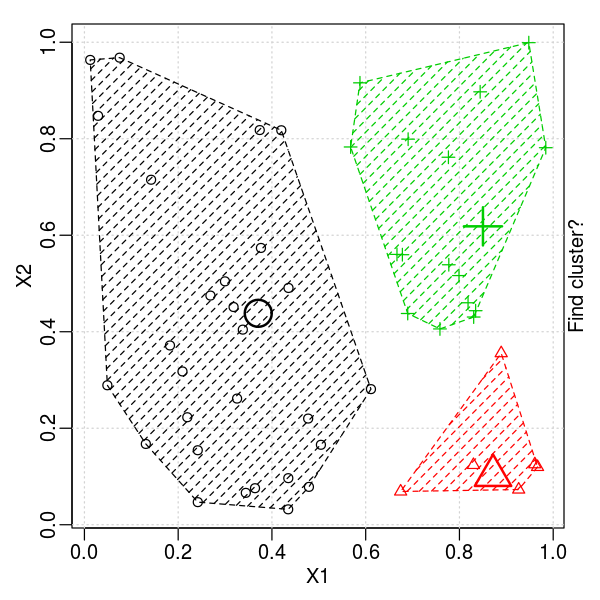

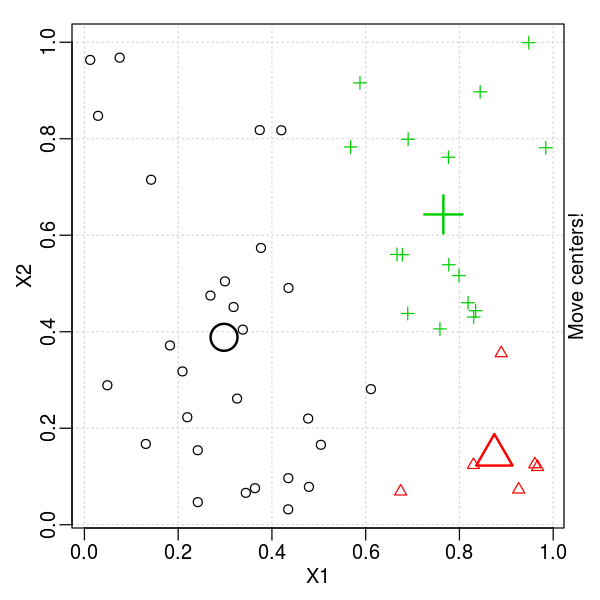

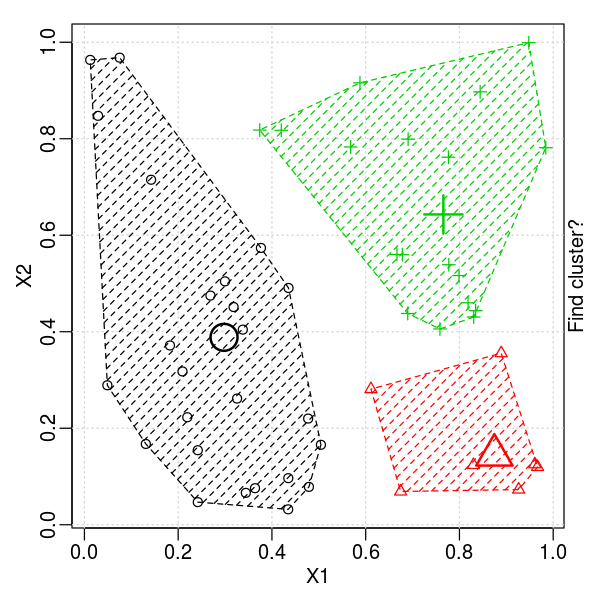

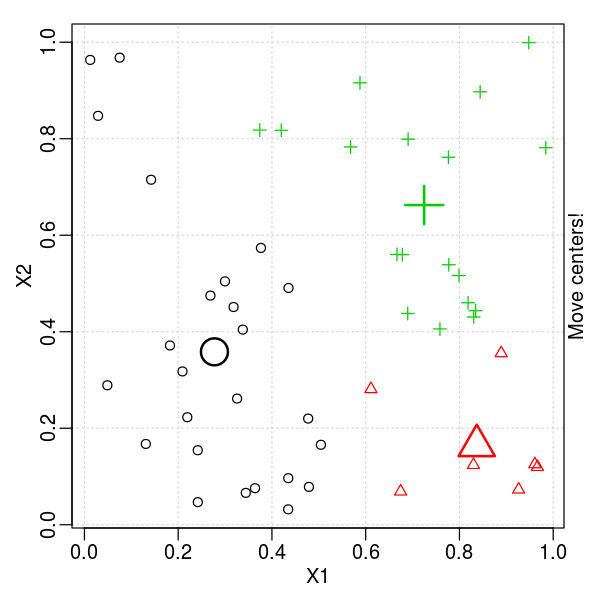

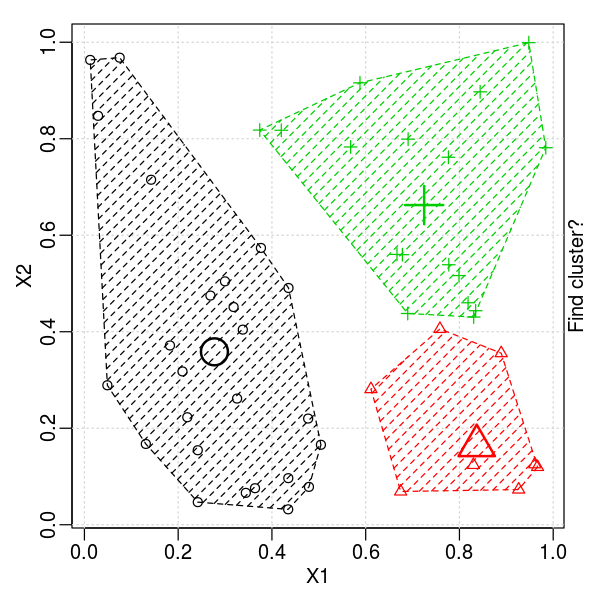

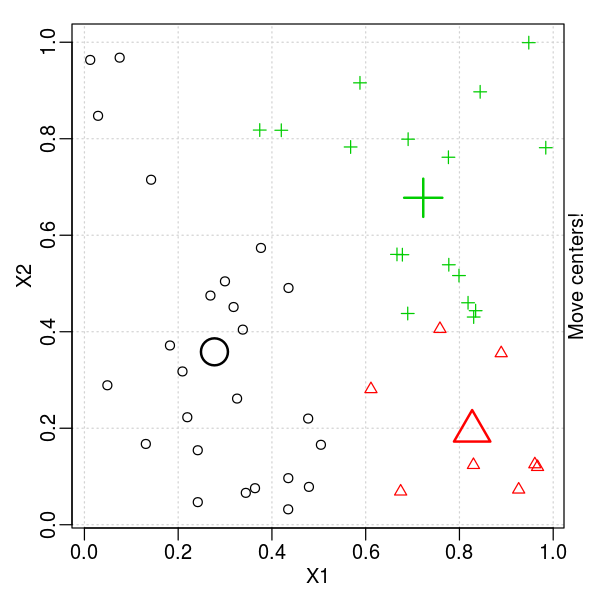

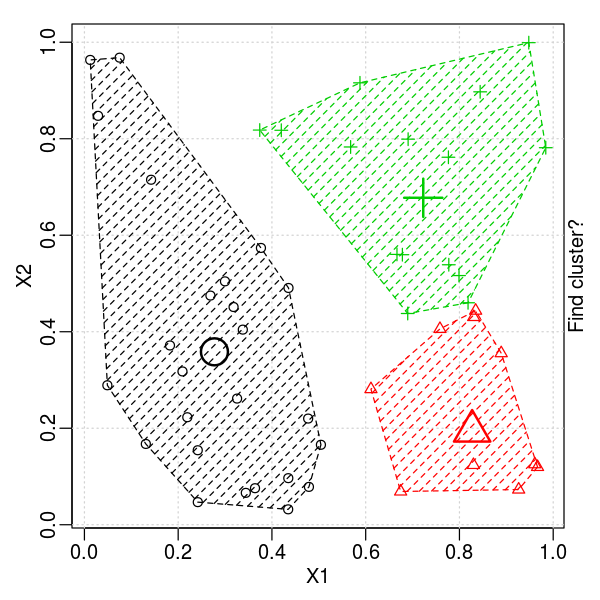

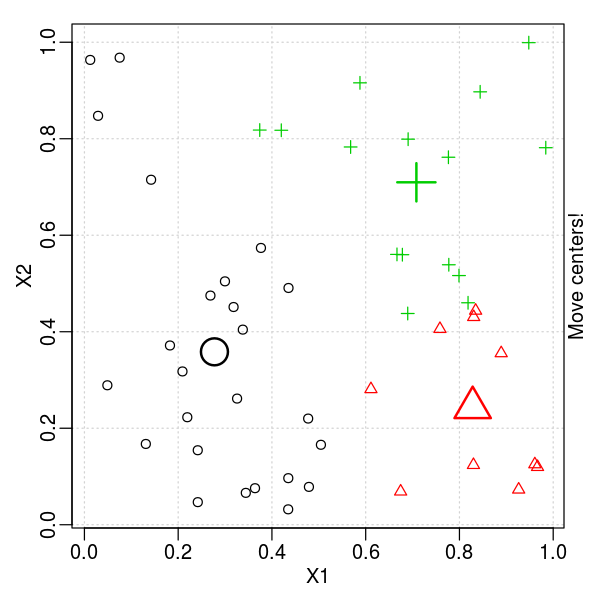

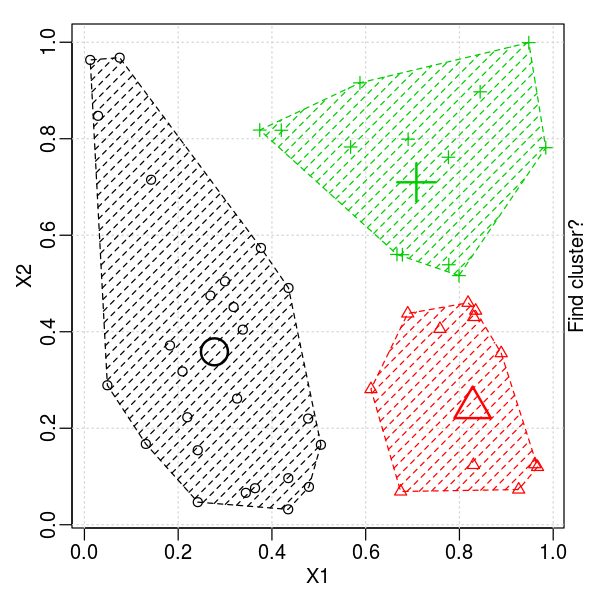

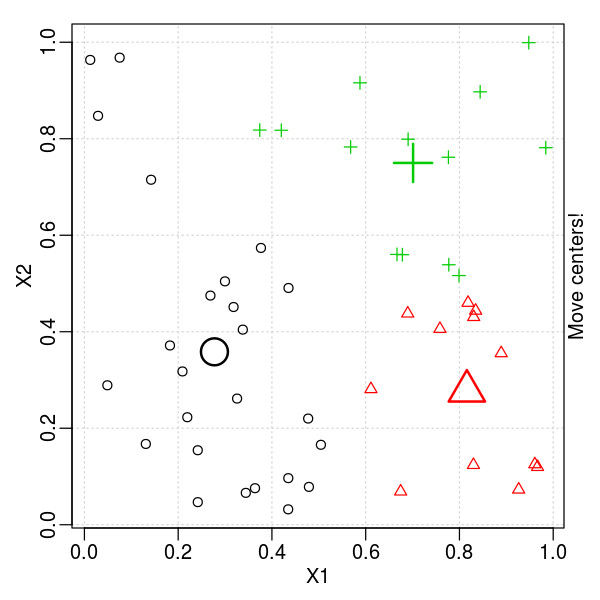

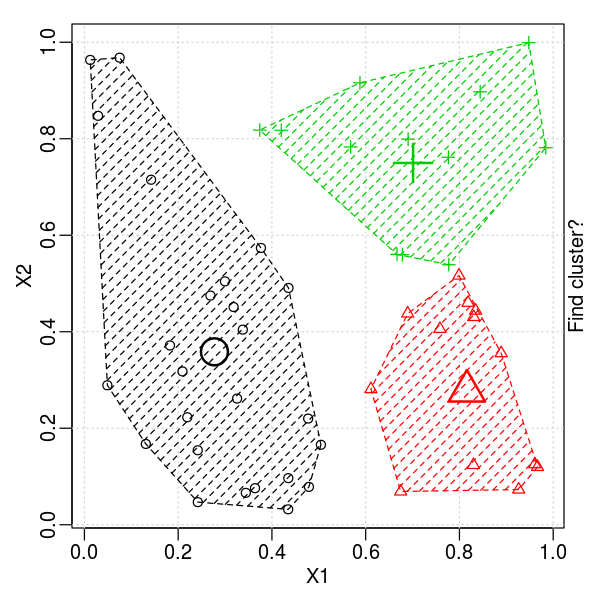

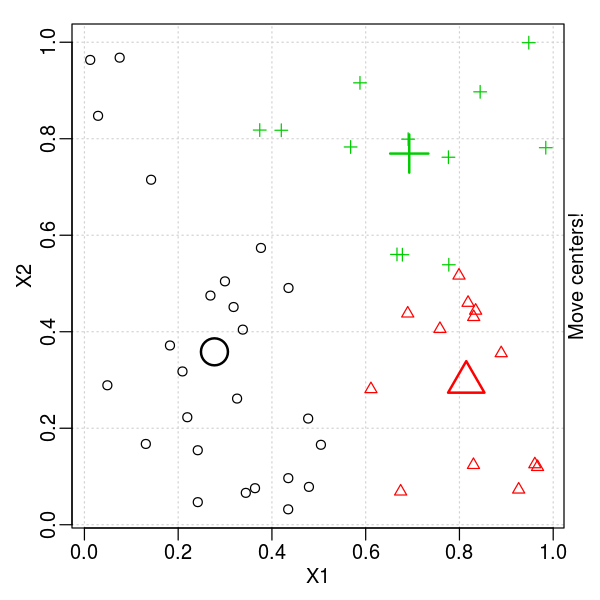

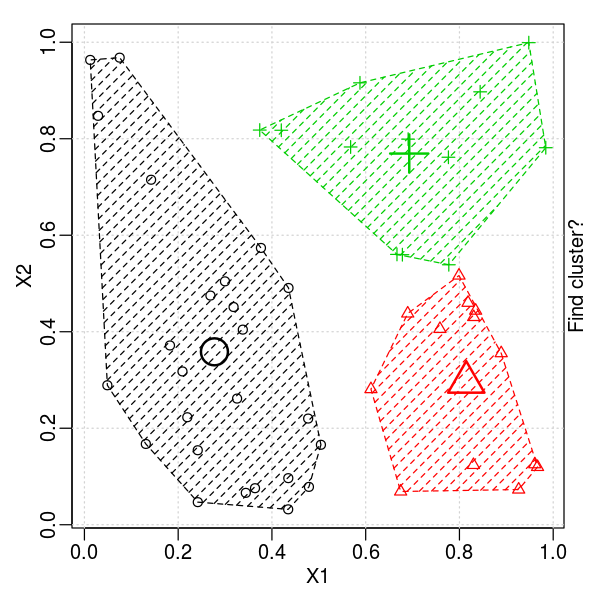

In [49]:
## set larger 'interval' if the speed is too fast
ani.options(interval = 1)
par(mar = c(3, 3, 1, 1.5), mgp = c(1.5, 0.5, 0))
kmeans.ani()

In [52]:
#也可以保存为动图或者视频
saveGIF(kmeans.ani())

Error in cmd.fun(sprintf("%s --version", convert), intern = TRUE) : 
  error in running command


I cannot find ImageMagick with convert = 'magick'
I find ImageMagick with convert = 'convert'. I will use 'convert' instead of 'magick'!
Executing: 
convert -loop 0 -delay 100 Rplot1.png Rplot2.png Rplot3.png Rplot4.png
    Rplot5.png Rplot6.png Rplot7.png Rplot8.png Rplot9.png Rplot10.png
    Rplot11.png Rplot12.png Rplot13.png Rplot14.png 'animation.gif'
Output at: animation.gif


[1] TRUE

![](./animation.gif)